In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
mdf = pd.read_csv("movies.csv")  #reading in the csv file into a Pandas Data Frame
mdf.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [3]:
mdf.shape

(9742, 3)

In [4]:
rdf = pd.read_csv("ratings.csv")  #reading in the csv file into a Pandas Data Frame
rdf.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [5]:
rdf.shape

(100836, 4)

In [6]:
rdf.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [7]:
rdf.unstack()

userId     0         1.000000e+00
           1         1.000000e+00
           2         1.000000e+00
           3         1.000000e+00
           4         1.000000e+00
                         ...     
timestamp  100831    1.493848e+09
           100832    1.493850e+09
           100833    1.494273e+09
           100834    1.493846e+09
           100835    1.493846e+09
Length: 403344, dtype: float64

In [8]:
ldf = pd.read_csv("links.csv", index_col = 0)  #reading in the csv file into a Pandas Data Frame
ldf.head(10)

,imdbId,tmdbId
movieId,,
1,114709,862.0
2,113497,8844.0
3,113228,15602.0
4,114885,31357.0
5,113041,11862.0
6,113277,949.0
7,114319,11860.0
8,112302,45325.0
9,114576,9091.0


In [9]:
ldf.shape

(9742, 2)

In [10]:
tdf = pd.read_csv("tags.csv", index_col = 0)  #reading in the csv file into a Pandas Data Frame
tdf.head(10)

,movieId,tag,timestamp
userId,,,
2,60756,funny,1445714994
2,60756,Highly quotable,1445714996
2,60756,will ferrell,1445714992
2,89774,Boxing story,1445715207
2,89774,MMA,1445715200
2,89774,Tom Hardy,1445715205
2,106782,drugs,1445715054
2,106782,Leonardo DiCaprio,1445715051
2,106782,Martin Scorsese,1445715056


In [11]:
tdf.shape

(3683, 3)

In [12]:
fdf = rdf.merge(mdf, on = 'movieId', how ='inner')
fdf.drop(columns=['title', 'genres', 'timestamp'], inplace = True)

In [13]:
fdf.head()

,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5


In [14]:
!pip install scikit-surprise

In [15]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader

In [45]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(fdf[['userId', 'movieId', 'rating']], reader)

In [57]:
from surprise import KNNBasic
from surprise import SVDpp
from surprise import SlopeOne
from surprise import NMF
from surprise import NormalPredictor
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import BaselineOnly
from surprise import CoClustering
from surprise.model_selection import cross_validate
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.867604,356.156443,12.124698
BaselineOnly,0.876170,0.268529,0.294571
SVD,0.880382,4.593707,0.440942
KNNBaseline,0.881680,0.334615,2.676905
KNNWithZScore,0.902931,0.198089,2.734788
KNNWithMeans,0.905676,0.143947,2.665525
SlopeOne,0.911864,4.199103,10.763260
NMF,0.935531,4.691012,0.233032
CoClustering,0.956309,2.446085,0.247722


In [26]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_from_df(fdf[['userId', 'movieId', 'rating']], reader)

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8690  0.8734  0.8804  0.8744  0.8661  0.8726  0.0049  
MAE (testset)     0.6666  0.6712  0.6751  0.6733  0.6651  0.6703  0.0038  
Fit time          5.50    5.60    5.23    5.23    5.18    5.35    0.17    
Test time         0.51    0.16    0.15    0.24    0.22    0.26    0.13    


{'test_rmse': array([0.86900604, 0.87341974, 0.88037199, 0.87435628, 0.86608658]),
 'test_mae': array([0.66659655, 0.67121905, 0.67506024, 0.67326864, 0.66510875]),
 'fit_time': (5.503967046737671,
  5.604751825332642,
  5.231664180755615,
  5.234809160232544,
  5.184356927871704),
 'test_time': (0.5072758197784424,
  0.15569400787353516,
  0.15108299255371094,
  0.24381208419799805,
  0.22126221656799316)}

# EDA

In [27]:
edf = rdf.merge(mdf, on = 'movieId', how ='inner')  #merged datasets in order for EDA
edf.drop(columns=['timestamp'], inplace = True)
edf.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [32]:
edf[edf["title"] == "Toy Story (1995)"] #wanted to check count of Toy Story Movie 

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
210,606,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
211,607,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
212,608,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
213,609,1,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [33]:
edf.isnull().sum()  

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

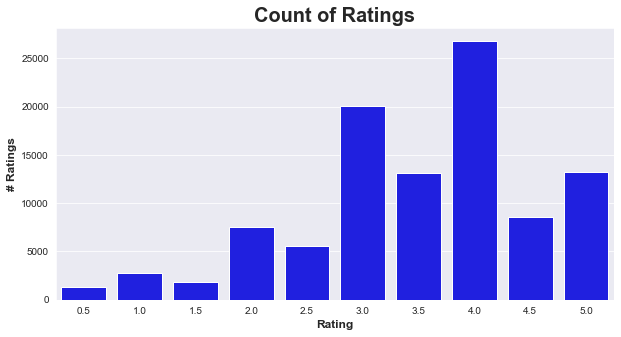

In [40]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(edf['rating'], palette = ['BLUE'])
plt.title('Count of Ratings', fontsize = 20,fontweight='bold')
plt.ylabel('# Ratings', fontsize = 12,fontweight='bold')
plt.xlabel('Rating', fontsize = 12,fontweight='bold')
plt.show()

In [56]:
from surprise.model_selection import GridSearchCV

params = {'n_factors': [20, 50, 100, 130],
         'reg_all': [0.02, 0.05, 0.1],
         "n_epochs": [15, 20, 30]}
g_s_svd = GridSearchCV(SVD, param_grid = params, n_jobs = -1, cv = 7)
g_s_svd.fit(data)

print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 0.8586672979080756, 'mae': 0.658733133933426}
{'rmse': {'n_factors': 100, 'reg_all': 0.05, 'n_epochs': 30}, 'mae': {'n_factors': 100, 'reg_all': 0.05, 'n_epochs': 30}}


# Hypothesis Testing

In [ ]:
chi_sq = fdf.groupby('rating')['userId'].value_counts()
chi_sq2 = chi_sq.unstack()
chi_sq2.fillna(0,inplace = True)
chi_sq2

In [ ]:
# contingency table
stat, p, dof, expected = chi2_contingency(chi_sq2)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)x
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

H0: There is no relationship between the User ID and Rating they give
HA: There is a relationship between the User ID and Rating they give

In [ ]:
fdf.userId.value_counts()